## Imports

In [1]:
from chord_geometry_int import ChordGeometryInterferometry
from magnetic_equilibrium import MagneticEquilibrium, MagneticEquilibriumSinglePoint
from interferometry import Interferometry, InterferometrySinglePoint
from density_profile import DensityProfile, DensityProfileSinglePoint
from forward_1d_triangle_int import compute_response_matrix, plot_geometry_with_mag_equi
import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize, basinhopping
import optuna

# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

%matplotlib inline

ModuleNotFoundError: No module named 'scipy'

In [2]:
def movie_geo_magequi(t_start,t_stop, shot):
    shot = 53259 # Shot number
    t = 5.21    # Time (relative to the start of plasma)

    # Geometry of the chords from interferometer (lines of sight)
    geo = ChordGeometryInterferometry(f'data/WEST/{shot}/los_interferometer_{shot}.mat')

    # Magnetic equilibrium calculated by equilibrium code NICE
    equi_all = MagneticEquilibrium()
    equi_all.load_from_imas(f'data/WEST/{shot}/imas_equilibrium_{shot}.mat', shot=shot)
    
    duration = t_stop - t_start
    fig, ax = plt.subplots()
    def make_frame(t):
        t = t+t_start
        ax.
        
        equi = equi_all.get_single_point(t)
        ax = plot_geometry_with_mag_equi(geo, equi)
        return mplfig_to_npimage(fig)
    animation = VideoClip(make_frame, duration = duration)

    
    equi = equi_all.get_single_point(t)
    
#     # Line integrated electron density measured by interferometer
#     interf_all = Interferometry()
#     interf_all.load_from_imas(f'data/WEST/{shot}/imas_interferometer_{shot}.mat', shot=shot)
#     interf = interf_all.get_single_point(t)

#     # Density profile calculated by equilibrium code NICE
#     dens_prof_all = DensityProfile()
#     dens_prof_all.load_from_imas(f'data/WEST/{shot}/imas_core_profiles_{shot}.mat', shot=shot)
#     dens_prof = dens_prof_all.get_single_point(t)

    
    plot_geometry_with_mag_equi(geo, equi)


SyntaxError: invalid syntax (1730716488.py, line 16)

## Load data (of a single time slice)

In [39]:
shot = 53259 # Shot number
t = 5.21    # Time (relative to the start of plasma)

# Geometry of the chords from interferometer (lines of sight)
geo = ChordGeometryInterferometry(f'data/WEST/{shot}/los_interferometer_{shot}.mat')

# Magnetic equilibrium calculated by equilibrium code NICE
equi_all = MagneticEquilibrium()
equi_all.load_from_imas(f'data/WEST/{shot}/imas_equilibrium_{shot}.mat', shot=shot)
equi = equi_all.get_single_point(t)

# Line integrated electron density measured by interferometer
interf_all = Interferometry()
interf_all.load_from_imas(f'data/WEST/{shot}/imas_interferometer_{shot}.mat', shot=shot)
interf = interf_all.get_single_point(t)

# Density profile calculated by equilibrium code NICE
dens_prof_all = DensityProfile()
dens_prof_all.load_from_imas(f'data/WEST/{shot}/imas_core_profiles_{shot}.mat', shot=shot)
dens_prof = dens_prof_all.get_single_point(t)

# plot_geometry_with_mag_equi(geo, equi)
fig = plot_geometry_with_mag_equi(geo, equi);

# duration of the video
duration = 1
# method to get frames
from matplotlib.backends.backend_agg import FigureCanvasAgg
import matplotlib.pyplot as plt
import numpy as np
def fig2np(fig):
    canvas = FigureCanvasAgg(fig)
    ax.plot([1, 2, 3, 4, 5], [2, 4, 1, 5, 2])
    canvas.draw()
    return np.array(canvas.buffer_rgba())

all_frames = np.zeros(im.shape)
# def make_frame(t):
for t in range(0,1,10):
    equi = equi_all.get_single_point(t)
    fig = plot_geometry_with_mag_equi(geo, equi)
    all_frames = np.stack((all_frames,fig2np(fig)))
all_frames.shape


def write_video(frames, video_dir, video_filename, fps):
    print('write video on')
    frame_width = frames[0].shape[1]
    frame_height = frames[0].shape[0]
    path = os.path.join(video_dir,video_filename)
    print('path,',path)
    # rate='2'
    vid_out = cv2.VideoWriter(path,cv2.VideoWriter_fourcc('M','J','P','G'), fps, (frame_width,frame_height))
    #vid_out = cv2.VideoWriter(path,cv2.VideoWriter_fourcc(*'MP4V'), 2, (frame_width,frame_height))

    for im in images:
        vid_out.write(np.uint8(im))
    vid_out.release()
    print("video saved at :", path)

from pathlib import Path
import cv2
write_video(all_frames,Path('videos'),'magflux.mp4',2)
    
import IPython
IPython.display.Video(Path('videos','magflux.mp4'))

    # returning numpy image
#     return fig2np(fig)

# creating animation
# animation = VideoClip(make_frame, duration = duration)
# animation.fx(vfx.speedx, 0.1)


# im = fig2np(fig)



ModuleNotFoundError: No module named 'cv2'

In [35]:

# # displaying animation with auto play and looping
# animation.ipython_display(fps = 20, loop = True, autoplay = True)
print(type(animation))

<class 'moviepy.video.VideoClip.VideoClip'>


t:   3%|▉                           | 32/1000 [12:59<08:51,  1.82it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4




t:   3%|▉                           | 32/1000 [13:17<08:51,  1.82it/s, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


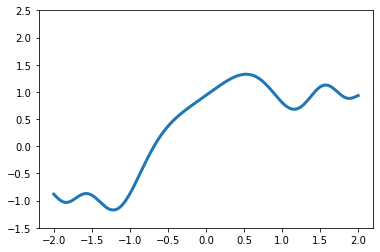

In [10]:
# importing matplot lib
import matplotlib.pyplot as plt
import numpy as np

# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from moviepy.editor import *
# numpy array
x = np.linspace(-2, 2, 200)

# duration of the video
duration = 5

# matplot subplot
fig, ax = plt.subplots()

# method to get frames
def make_frame(t):
	# clear
	ax.clear()
	
	# plotting line
	ax.plot(x, np.sinc(x**2) + np.sin(x + 2 * np.pi / duration * t), lw = 3)
	ax.set_ylim(-1.5, 2.5)
	
	# returning numpy image
	return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)
animation.fx(vfx.speedx, 0.5)
# displaying animation with auto play and looping
animation.ipython_display(fps = 20, loop = True, autoplay = True)


[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]


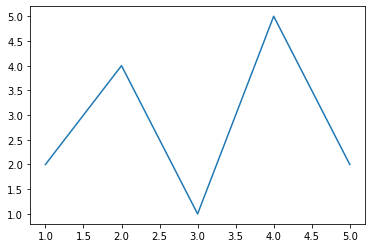

In [21]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
import matplotlib.pyplot as plt
import numpy as np

def fig2np(fig):
    canvas = FigureCanvasAgg(fig)
    ax.plot([1, 2, 3, 4, 5], [2, 4, 1, 5, 2])
    canvas.draw()
    return np.array(canvas.buffer_rgba())


In [ ]:
lid_data = interf.lid.compressed()

In [ ]:
def chol_inv(A):
    L = np.linalg.cholesky(A)
    return np.linalg.inv(L).T @ np.linalg.inv(L)
def chol_det(A):
    L = np.linalg.cholesky(A)
    return np.prod(np.diag(L))

In [ ]:
##Prior
exp_er = 0.01
rho_1d = dens_prof.rho_tor_norm_1d
N = len(rho_1d)
mu_prior = np.zeros(N)
lid_data = interf.lid.compressed()
#exponential square kernel
def Kernel(rho1,rho2,params):
    #amplitude determins how far the model can go from the mean
    amp = params[0]
    #length scale determines smoothness, how correlated the function should be at a distance
    l = params[1]
    return amp**2 * np.exp(-((rho1-rho2)*(rho1-rho2))/(2*l**2))

def KRcov_li(params,trial_exp_er):
    rho1, rho2 = np.meshgrid(rho_1d,rho_1d)
    #covergence matrix of Prior
    K = Kernel(rho1,rho2,params)
    #add a small term onto diagonal of matricies to be inverted.
    #this ensures it is positive definate and cholensky matrix can be computed
    K[np.diag_indices_from(K)] += 1e-8 
    #covergence matrix of Likelyhood
    cov_li = np.diag(np.repeat(trial_exp_er,10))
    R = compute_response_matrix(geo, equi, dens_prof.rho_tor_norm_1d)
    return K, R, cov_li

def MargLi(params):
    K, R, cov_li = KRcov_li(params,exp_er)
    invertable = cov_li + R @ K @ R.T
    #add a small term onto diagonal of matricies to be inverted.
    #this ensures it is positive definate and cholensky matrix can be computed
    invertable[np.diag_indices_from(invertable)] += 1e-8 
    return 0.5*np.log(chol_det(cov_li + R@K@R.T)) + 0.5*(lid_data.T@chol_inv(cov_li+R@K@R.T)@lid_data)                
    
x0=[0.76,0.01]
results = minimize(MargLi, x0=x0)
# results = basinhopping(MargLi, x0=x0, niter=100)
print(results)
best_params = results.x
# best_params = x0

def PlotBest(params,trial_exp_er): 
    K, R, cov_li = KRcov_li(params,trial_exp_er)
#     print(K)
    cov_post3 = chol_inv(R.T @ chol_inv(cov_li) @ R + chol_inv(K))
    mu_post3 = mu_prior + cov_post3 @ R.T @ chol_inv(cov_li) @ (lid_data - R @ mu_prior)
    error_bars3 = 1.96*np.sqrt(np.diagonal(cov_post3))

    print('\n\nNot good if zero, as need to be chol_inverted.')
    print('The Determinent of K is:', chol_det(K))
    print('The Determinent of cov_li is:', chol_det(cov_li))
    print('The Determinent of cov_post3 is:', chol_det(cov_post3))

    figGPR3 = plt.figure(figsize=(5,3))
    plt.title('Electron Density Profile')
    plt.xlabel(r'Normalised Radius $\rho$')
    plt.ylabel(r'Electron Density $n_e$')
    plt.plot(rho_1d, dens_prof.dens_1d,'r', label='NICE profile')
    plt.plot(rho_1d, mu_post3,'g', label='Gaussian Process Profile')
    plt.errorbar(rho_1d, mu_post3, yerr=error_bars3, label='95% Confidance Interval of Inference', fmt='none')
    plt.legend()
    plt.show()

PlotBest(best_params, exp_er)

## Validation of the forward model

In [ ]:
# The response matrix used for calculating line integrals
response = compute_response_matrix(geo, equi, dens_prof.rho_tor_norm_1d)



# Calculate the line integrated density using density profile fitted by NICE
lid_calculated = response @ dens_prof.dens_1d

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(dens_prof.rho_tor_norm_1d, dens_prof.dens_1d)
ax1.set_xlabel(r'$\rho$')
ax1.set_ylabel(r'$n_e[\mathrm{10^{19} m^{-3}}]$')
ax1.set_title('Electron density profile fitted by NICE')

ax2.plot(interf.channels.compressed(), interf.lid.compressed(), label='measured')
ax2.plot(interf.channels.compressed(), lid_calculated, label='calculated')
ax2.set_xticks(interf.channels.data)
ax2.set_xlabel('channel')
ax2.set_ylabel(r'$[\mathrm{10^{19} m^{-2}}]$')
ax2.set_title('Line integrated density')
ax2.legend()
plt.tight_layout()